In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def diff_sar_step(vip, vin, vref, k):
    d = None
    
    if vip > vin:
        d = 1
        vip = vip - vref / (2 ** k)
    else:
        d = 0
        vin = vin - vref / (2 ** k)

    return d, vip, vin

def diff_sar_step_monotonic(vip, vin, vref, k):
    if k > 4:
        return diff_sar_step(vip, vin, vref, k)

    d = None
    
    if vip >= vin:
        d = 1
        vip = vip - vref / (2 ** (k + 1))
        vin = vin + vref / (2 ** (k + 1))
    else:
        d = 0
        vin = vin - vref / (2 ** (k + 1))
        vip = vip + vref / (2 ** (k + 1))

    return d, vip, vin

def result_convert(ds):
    result = 0
    for i in range(len(ds)):
        result += ds[i] * (2 ** (len(ds) - i - 1))
    return result

In [3]:
k = 1
n = 8
vref = 1.5
vip = 1.25
vin = 0.25

vips =[vip, vip]
vins =[vin, vin]
ds = []

while k < n:
    d, vip, vin = diff_sar_step(vip, vin, vref, k)
    vips.append(vip)
    vins.append(vin)
    ds.append(d)
    k += 1

d, _, _ = diff_sar_step(vip, vin, vref, k)
ds.append(d)
print(f"SAR result: 0x{result_convert(ds):X}")

SAR result: 0xD5


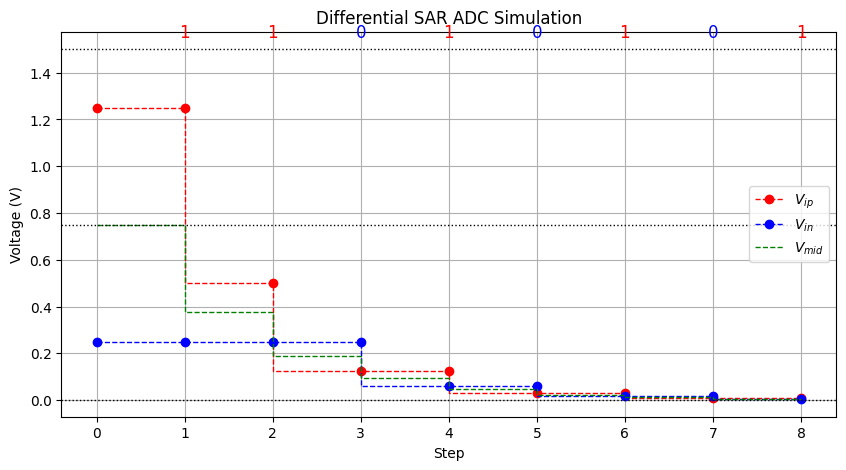

In [4]:
plt.figure(figsize=(10, 5))

# Plot the results
plt.plot(range(len(vips)), vips, label='$V_{{ip}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='red')
plt.plot(range(len(vins)), vins, label='$V_{{in}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='blue')
plt.plot(range(len(vins)), [(vip + vin) / 2 for vip, vin in zip(vips, vins)], label='$V_{{mid}}$', drawstyle='steps-pre', linestyle='--', linewidth=1, color='green')

# Add reference voltage lines
plt.axhline(y=vref, color='black', linestyle=':', linewidth=1)
plt.axhline(y=vref/2, color='black', linestyle=':', linewidth=1)
plt.axhline(y=0, color='black', linestyle=':', linewidth=1)

# Add step markers for decisions
for i, d in enumerate(ds):
    if d == 1:
        plt.text(i + 1, vref + 0.05, '1', fontsize=12, ha='center', color='red')
    else:
        plt.text(i + 1, vref + 0.05, '0', fontsize=12, ha='center', color='blue')


plt.title('Differential SAR ADC Simulation')
plt.xlabel('Step')
plt.ylabel('Voltage (V)')
plt.xticks(range(len(vips)))
plt.grid()
plt.legend()
plt.show()

In [22]:
k = 1
n = 8
vref = 1.5
vip = 0.6
vin = 0.9

vips =[vip, vip]
vins =[vin, vin]
ds = []

while k < n:
    d, vip, vin = diff_sar_step_monotonic(vip, vin, vref, k)
    vips.append(vip)
    vins.append(vin)
    ds.append(d)
    k += 1

d, _, _ = diff_sar_step_monotonic(vip, vin, vref, k)
ds.append(d)
print(f"SAR result: 0x{result_convert(ds):X}")

SAR result: 0x66


In [67]:
def convert(vip, vin, vref=1.5, n=8):
    k = 1
    vips = [vip, vip]
    vins = [vin, vin]
    ds = []

    while k < n:
        d, vip, vin = diff_sar_step(vip, vin, vref, k)
        vips.append(vip)
        vins.append(vin)
        ds.append(d)
        k += 1

    d, _, _ = diff_sar_step(vip, vin, vref, k)
    ds.append(d)
    
    return result_convert(ds)

In [72]:
vips =      [0.05, 0.25, 0.45, 0.65, 0.85, 1.05, 1.25, 1.45]
vins =      [1.45, 1.25, 1.05, 0.85, 0.65, 0.45, 0.25, 0.05]
expecteds = [convert(vip, vin) for vip, vin in zip(vips, vins)]

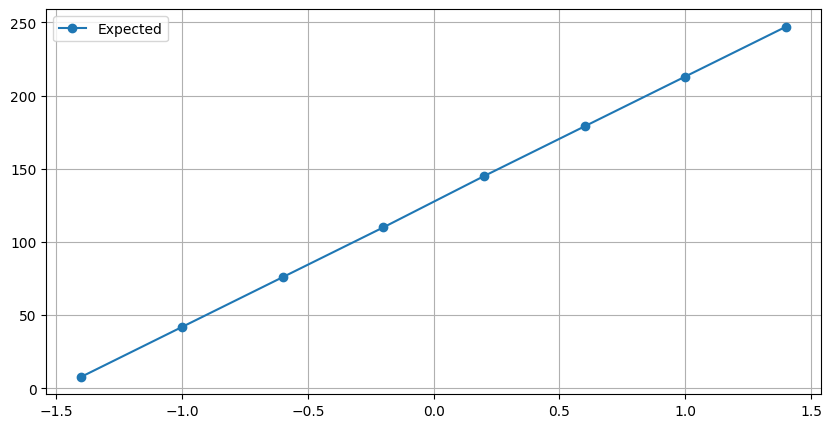

In [73]:
vdiffs = [vip - vin for vip, vin in zip(vips, vins)]

plt.figure(figsize=(10, 5))
plt.plot(vdiffs, expecteds, "o-", label="Expected")
plt.legend()
plt.grid()
plt.show()

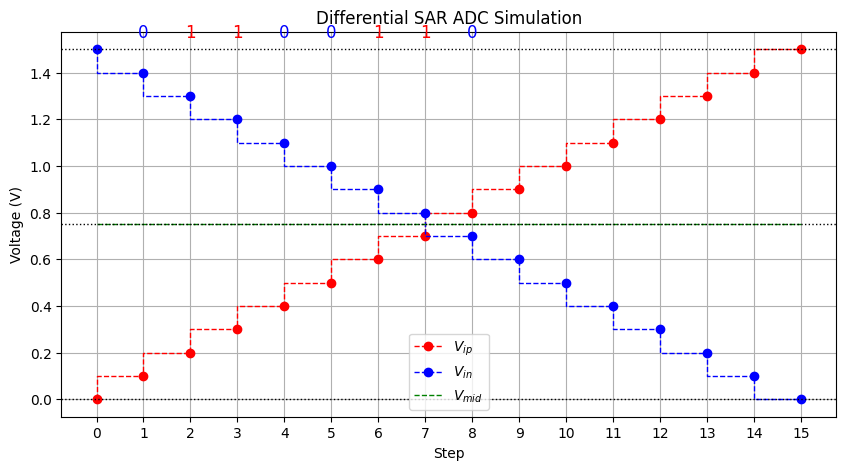

In [60]:
plt.figure(figsize=(10, 5))

# Plot the results
plt.plot(range(len(vips)), vips, label='$V_{{ip}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='red')
plt.plot(range(len(vins)), vins, label='$V_{{in}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='blue')
plt.plot(range(len(vins)), [(vip + vin) / 2 for vip, vin in zip(vips, vins)], label='$V_{{mid}}$', drawstyle='steps-pre', linestyle='--', linewidth=1, color='green')

# Add reference voltage lines
plt.axhline(y=vref, color='black', linestyle=':', linewidth=1)
plt.axhline(y=vref/2, color='black', linestyle=':', linewidth=1)
plt.axhline(y=0, color='black', linestyle=':', linewidth=1)

# Add step markers for decisions
for i, d in enumerate(ds):
    if d == 1:
        plt.text(i + 1, vref + 0.05, '1', fontsize=12, ha='center', color='red')
    else:
        plt.text(i + 1, vref + 0.05, '0', fontsize=12, ha='center', color='blue')


plt.title('Differential SAR ADC Simulation')
plt.xlabel('Step')
plt.ylabel('Voltage (V)')
plt.xticks(range(len(vips)))
plt.grid()
plt.legend()
plt.show()

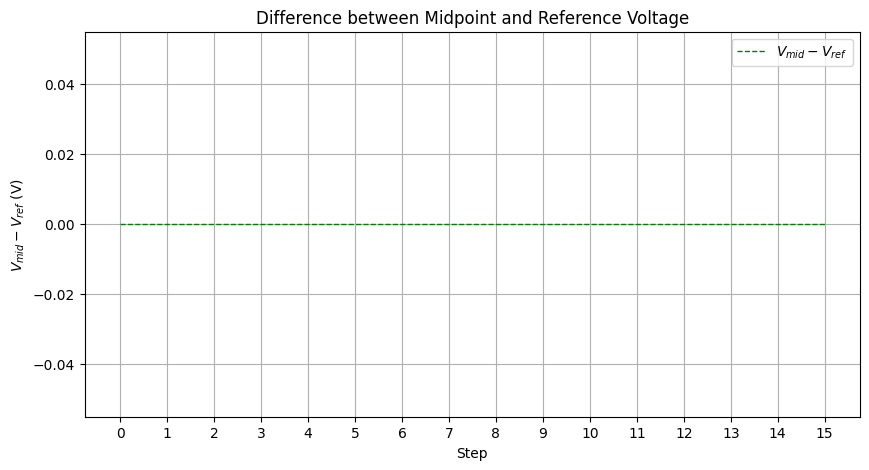

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(vins)), [(vip + vin) / 2 - vref / 2 for vip, vin in zip(vips, vins)], label='$V_{{mid}} - V_{{ref}}$', drawstyle='steps-pre', linestyle='--', linewidth=1, color='green')
plt.title('Difference between Midpoint and Reference Voltage')
plt.xlabel('Step')
plt.ylabel('$V_{{mid}} - V_{{ref}}$ (V)')
plt.xticks(range(len(vins)))
plt.grid()
plt.legend()
plt.show()